## Modelling Data

The aim of this project is to create and evaluate regression model for predicting the price of a house in Ames city at the time of sale. 

This notebook contains building and evaluation of models through train data and predicting the sale price through test data.

### Contents:
- [Import Train & Test Data](#Import-Train-and-Test-Data)
- [Declare Features & Target](#Declare-Features-and-Target)
- [Train/Test Split](#Train/Test-Split)
- [Lasso Regression For Feature Selection](#Lasso-Regression-For-Feature-Selection)
- [Redeclare Features & Model Evaluation](#Redeclare-Features-and-Model-Evaluation)
    - [Linear Regression](#Linear-Regression)
    - [Ridge Regression](#Ridge-Regression)
    - [Lasso Regression](#Lasso-Regression)
    - [Comparing RMSE](#Comparing-RMSE)
-[Train On Entire Dataset](#Train-On-Entire-Dataset)
-[Predict On Test Data](#Predict-On-Test-Data)
-[Conclusion & Recommendation](#Conclusion-and-Recommendation)

In [345]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from tabulate import tabulate

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

## Import Train and Test Data

In [346]:
housing_train = pd.read_csv('../datasets/housing_train_cleaned.csv')

In [347]:
housing_train.shape

(2045, 223)

In [348]:
housing_train.head()

,id,lot_frontage,lot_area,lot_shape,land_slope,overall_qual,overall_cond,house_age,year_remod/add,mas_vnr_area,...,misc_feature_TenC,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,109,68.0,13517,3,4,6,8,45,2005,289.0,...,0,0,0,0,0,0,0,0,0,1
1,544,43.0,11492,3,4,7,5,25,1997,132.0,...,0,0,0,0,0,0,0,0,0,1
2,153,68.0,7922,4,4,5,7,68,2007,0.0,...,0,0,0,0,0,0,0,0,0,1
3,318,73.0,9802,4,4,5,5,15,2007,0.0,...,0,0,0,0,0,0,0,0,0,1
4,255,82.0,14235,3,4,6,8,121,1993,0.0,...,0,0,0,0,0,0,0,0,0,1


In [349]:
housing_test = pd.read_csv('../datasets/housing_test_cleaned.csv')

In [350]:
housing_test.shape

(879, 218)

In [351]:
housing_test.head()

,id,lot_frontage,lot_area,lot_shape,land_slope,overall_qual,overall_cond,house_age,year_remod/add,mas_vnr_area,...,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD
0,2658,69.0,9142,4,4,6,8,111,1950,0.0,...,0,0,0,0,0,0,0,0,0,1
1,2718,68.0,9662,3,4,5,4,44,1977,0.0,...,0,0,0,0,0,0,0,0,0,1
2,2414,58.0,17104,3,4,7,5,15,2006,0.0,...,0,0,0,0,0,0,1,0,0,0
3,1989,60.0,8520,4,4,5,6,98,2006,0.0,...,0,0,0,0,0,0,0,0,0,1
4,625,68.0,9500,3,4,6,5,58,1963,247.0,...,0,0,0,0,0,0,0,0,0,1


## Declare Features and Target

Using lasso regression for feature selection, so at first will declare all the columns except sale price as features.

Sales price will be our target.

In [352]:
features = housing_train.columns.to_list()
features.remove('saleprice')

X = housing_train[features]
y = housing_train['saleprice']

In [353]:
X.head()

,id,lot_frontage,lot_area,lot_shape,land_slope,overall_qual,overall_cond,house_age,year_remod/add,mas_vnr_area,...,misc_feature_TenC,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,109,68.0,13517,3,4,6,8,45,2005,289.0,...,0,0,0,0,0,0,0,0,0,1
1,544,43.0,11492,3,4,7,5,25,1997,132.0,...,0,0,0,0,0,0,0,0,0,1
2,153,68.0,7922,4,4,5,7,68,2007,0.0,...,0,0,0,0,0,0,0,0,0,1
3,318,73.0,9802,4,4,5,5,15,2007,0.0,...,0,0,0,0,0,0,0,0,0,1
4,255,82.0,14235,3,4,6,8,121,1993,0.0,...,0,0,0,0,0,0,0,0,0,1


In [354]:
X.shape

(2045, 222)

In [355]:
y.shape

(2045,)

## Train/Test Split

We will use train_test_split of sklearn to split the data into train and validation/holdout data. So we can fit the train data and validate the model through holdout data.

In [356]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state = 42)

In [357]:
print('Shape: \nX_train: ' + str(X_train.shape) + '\nX_val: ' + str(X_val.shape) + '\ny_train: ' + str(y_train.shape) + \
     '\ny_test: ' + str(y_val.shape))

Shape: 
X_train: (1533, 222)
X_val: (512, 222)
y_train: (1533,)
y_test: (512,)


In [358]:
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_val_scaled = ss.transform(X_val)

In [359]:
X_train_scaled.shape

(1533, 222)

## Lasso Regression For Feature Selection

In [360]:
lasso = LassoCV(n_alphas=300, max_iter = 1000)
lasso.fit(X_train_scaled, y_train)

LassoCV(n_alphas=300)

In [361]:
lasso.alpha_

480.36116904880413

In [362]:
lasso_cv_score = cross_val_score(lasso, X_train_scaled, y_train, cv = 5).mean()
lasso_cv_score

0.9074367136084147

In [363]:
coefs = lasso.coef_
lasso_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':coefs})
lasso_coefs.sort_values('coef', inplace=True, ascending=False)

lasso_coefs

,variable,coef
24,gr_liv_area,25461.628794
5,overall_qual,12804.765728
16,bsmtfin_sf_1,8501.688936
19,total_bsmt_sf,7347.696291
106,neighborhood_NridgHt,7193.100869
...,...,...
149,roof_style_Mansard,-1596.821371
13,bsmt_cond,-1795.695524
29,bedroom_abvgr,-2515.740290
187,mas_vnr_type_BrkFace,-2980.201738


In [364]:
coefs_selected = lasso_coefs[(lasso_coefs['coef'] > 1600) | (lasso_coefs['coef'] < -1800)] 
coefs_selected

,variable,coef
24,gr_liv_area,25461.628794
5,overall_qual,12804.765728
16,bsmtfin_sf_1,8501.688936
19,total_bsmt_sf,7347.696291
106,neighborhood_NridgHt,7193.100869
10,exter_qual,6435.190270
9,mas_vnr_area,5444.475929
112,neighborhood_StoneBr,5377.208221
31,kitchen_qual,4675.271769
219,sale_type_New,4609.705002


In [365]:
features_sel = coefs_selected['variable'].tolist()

Selecting common features from train and test data as few nominal fields might be different in both datasets.

In [366]:
common_features = list(set(features_sel).intersection(housing_test.columns))

In [367]:
common_features

['mas_vnr_area',
 'overall_qual',
 'neighborhood_Crawfor',
 'land_contour_HLS',
 'lot_area',
 'roof_matl_WdShngl',
 'kitchen_qual',
 'sale_type_New',
 'bsmt_exposure',
 'functional',
 'gr_liv_area',
 'total_bsmt_sf',
 'wood_deck_sf',
 'bldg_type_1Fam',
 'bsmtfin_sf_1',
 'roof_style_Hip',
 'condition_1_PosN',
 'mas_vnr_type_BrkFace',
 'bedroom_abvgr',
 'neighborhood_Somerst',
 'house_age',
 'fireplaces',
 'neighborhood_NridgHt',
 'exterior_1st_BrkFace',
 'bsmt_full_bath',
 'neighborhood_NoRidge',
 'overall_cond',
 'neighborhood_StoneBr',
 'exter_qual',
 'screen_porch',
 'garage_area']

## Redeclare Features For Model Evaluation

In [368]:
X = X[common_features]

# y will remain the same so no need to declare again.

In [369]:
X.head()

,mas_vnr_area,overall_qual,neighborhood_Crawfor,land_contour_HLS,lot_area,roof_matl_WdShngl,kitchen_qual,sale_type_New,bsmt_exposure,functional,...,fireplaces,neighborhood_NridgHt,exterior_1st_BrkFace,bsmt_full_bath,neighborhood_NoRidge,overall_cond,neighborhood_StoneBr,exter_qual,screen_porch,garage_area
0,289.0,6,0,0,13517,0,4,0,1,7,...,0,0,0,0.0,0,8,0,4,0,475.0
1,132.0,7,0,0,11492,0,4,0,1,7,...,1,0,0,1.0,0,5,0,4,0,559.0
2,0.0,5,0,0,7922,0,4,0,1,7,...,0,0,0,1.0,0,7,0,3,0,246.0
3,0.0,5,0,0,9802,0,3,0,1,7,...,0,0,0,0.0,0,5,0,3,0,400.0
4,0.0,6,0,0,14235,0,3,0,1,7,...,0,0,0,0.0,0,8,0,3,0,484.0


In [370]:
X.shape

(2045, 31)

In [371]:
y.shape

(2045,)

In [372]:
X_train, X_val , y_train, y_val = train_test_split(X, y, random_state = 42)

In [373]:
print('Shape: \nX_train: ' + str(X_train.shape) + '\nX_test: ' + str(X_val.shape) + '\ny_train: ' + str(y_train.shape) + \
     '\ny_test: ' + str(y_val.shape))

Shape: 
X_train: (1533, 31)
X_test: (512, 31)
y_train: (1533,)
y_test: (512,)


In [374]:
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_val_scaled = ss.transform(X_val)

We will now see model evaluation for Linear, Ridge and Lasso Regression and pick the best model to further predict the sale price.

### Linear Regression

In [375]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [376]:
#R2 score for linear regresion
lr_r2_scores = cross_val_score(lr, X_train_scaled, y_train, cv = 5)
lr_r2_scores.mean()

0.9085237372915147

In [377]:
#MSE for linear regression
lr_mse_scores = -cross_val_score(lr, X_train_scaled, y_train, cv = 5, scoring = 'neg_mean_squared_error')
lr_mse_scores.mean()

589166577.3868287

In [378]:
lr_preds = lr.predict(X_train_scaled)
lr_preds

array([202898.41976773, 310426.8785849 , 146087.45726751, ...,
       231743.0560188 , 130582.99615576, 239566.49537653])

In [379]:
lr_train_rmse = np.sqrt(mean_squared_error(lr_preds, y_train))
lr_train_rmse

23316.96121736754

In [380]:
lr_preds_val = lr.predict(X_val_scaled)

In [381]:
lr_val_rmse = np.sqrt(mean_squared_error(lr_preds_val, y_val))
lr_val_rmse

22797.442605650387

### Ridge Regression

In [382]:
ridge_cv = RidgeCV(alphas=np.logspace(-3, 3, 3000))
ridge_cv.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([1.00000000e-03, 1.00461733e-03, 1.00925599e-03, ...,
       9.90828902e+02, 9.95403889e+02, 1.00000000e+03]))

In [383]:
ridge_cv.alpha_

15.900122373149369

In [384]:
#R2 score for ridge
ridge_r2_scores = cross_val_score(ridge_cv, X_train_scaled, y_train, cv = 5).mean()
ridge_r2_scores

0.9088450970249641

In [385]:
#MSE score for ridge
ridge_mse_scores = -cross_val_score(ridge_cv, X_train_scaled, y_train, cv = 5, scoring = 'neg_mean_squared_error').mean()
ridge_mse_scores

587029235.7774092

In [386]:
ridge_op_alpha = ridge_cv.alpha_
ridge_op_alpha

15.900122373149369

In [387]:
r_coefs = ridge_cv.coef_
r_coefs

array([ 6266.39836203, 11673.02762839,  2294.40960671,  2926.93996443,
        4892.98208667,  1987.14613975,  5140.98365481,  5746.41368366,
        4886.39955893,  3116.67596724, 27274.77259856,  6274.17509076,
        2304.52340743,  6156.74434044,  8367.36924993,  2698.26976485,
        2012.32431471, -4333.016627  , -2807.29744415,  2913.8537899 ,
       -9902.16798528,  1846.76987173,  8357.80817185,  2843.3329066 ,
        1726.23914281,  3952.67292953,  5558.73162381,  6038.50927172,
        7263.60344547,  3451.14781629,  3410.51058943])

In [388]:
ridge_preds = ridge_cv.predict(X_train_scaled)

In [389]:
ridge_train_rmse = np.sqrt(mean_squared_error(ridge_preds, y_train))
ridge_train_rmse

23323.328558084373

In [390]:
ridge_preds_test = ridge_cv.predict(X_val_scaled)

In [391]:
ridge_val_rmse = np.sqrt(mean_squared_error(ridge_preds_test, y_val))
ridge_val_rmse

22786.200768464998

In [392]:
ridge_residuals = y_val - ridge_preds_test
ridge_residuals

305      1426.217198
1283      -16.502248
368      6459.253650
479     29502.234569
1537    23156.949292
            ...     
1343     9121.103733
817    -20873.598970
706     28175.074198
415     -7807.704760
273     -1733.166664
Name: saleprice, Length: 512, dtype: float64

### Lasso Regression

In [393]:
lasso_cv = LassoCV(n_alphas= 300)
lasso_cv.fit(X_train_scaled, y_train)

LassoCV(n_alphas=300)

In [394]:
#R2 scores for lasso
lasso_r2_scores = cross_val_score(lasso_cv, X_train_scaled, y_train, cv = 5)
lasso_r2_scores.mean()

0.9087504220957925

In [395]:
#MSE scores for Lasso
lasso_mse_scores = -cross_val_score(lasso_cv, X_train_scaled, y_train, cv = 5, scoring = 'neg_mean_squared_error')
lasso_mse_scores.mean()

587620661.009083

In [396]:
lasso_op_alpha = lasso_cv.alpha_
lasso_op_alpha

64.36624798066654

In [397]:
coefs = lasso_cv.coef_
coefs

array([  6204.10689736,  11702.62425288,   2244.9441047 ,   2892.64837214,
         4842.35151842,   1937.66960168,   4979.24640144,   5724.90603673,
         4902.78477675,   3122.09989477,  28015.0757394 ,   6225.56719658,
         2201.12206096,   6215.94827184,   8489.99535388,   2681.60397729,
         1974.6148809 ,  -4298.6898101 ,  -3119.3515347 ,   2843.78841792,
       -10072.4639531 ,   1645.71804627,   8375.70045538,   2806.39219948,
         1632.30986411,   3828.01440367,   5616.60215286,   5992.35872456,
         7191.57159906,   3417.34413217,   3221.17179372])

In [398]:
lasso_preds = lasso_cv.predict(X_train_scaled)

In [399]:
lasso_train_rmse = np.sqrt(mean_squared_error(lasso_preds, y_train))

In [400]:
lasso_predictions_test = lasso_cv.predict(X_val_scaled)

In [401]:
lasso_val_rmse = np.sqrt(mean_squared_error(lasso_predictions_test, y_val))

In [402]:
lasso_residuals = lasso_predictions_test - y_val
lasso_residuals

305     -1778.713825
1283      138.686833
368     -6781.142781
479    -28901.371690
1537   -23923.639206
            ...     
1343    -9974.480028
817     20741.469552
706    -28484.720498
415      8156.346558
273       572.721029
Name: saleprice, Length: 512, dtype: float64

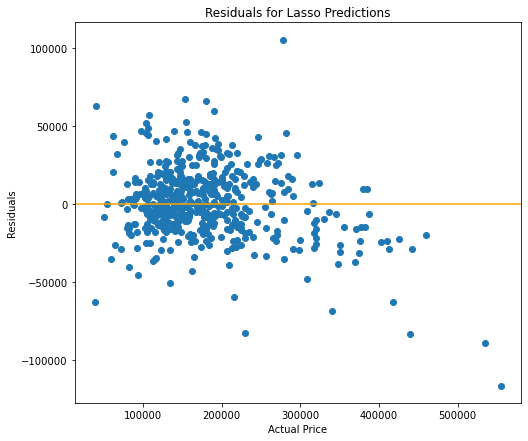

In [403]:
plt.figure(figsize = (8, 7))
plt.scatter(y_val, lasso_residuals)
plt.title('Residuals for Lasso Predictions')
plt.xlabel('Actual Price')
plt.ylabel('Residuals')
plt.axhline(0, color = 'orange')

### Comparing RMSE scores across Linear, Ridge, Lasso regression

In [404]:
rmse = [['Train', lr_train_rmse, ridge_train_rmse, lasso_train_rmse],
        ['Val', lr_val_rmse, ridge_val_rmse, lasso_val_rmse]]
print (tabulate(rmse, headers=["","Linear Regression", "Ridge Regression", "Lasso regression"]))

         Linear Regression    Ridge Regression    Lasso regression
-----  -------------------  ------------------  ------------------
Train              23317               23323.3             23319
Val                22797.4             22786.2             22769.8


**Evaluation:**

The RMSE of Lasso regression model for validation data is the lowest, which means it has the lowest error of the other two regression model. So we will use lasso for predicting sale price.

## Train On Entire Dataset

In [405]:
X = housing_train[common_features]
y = housing_train['saleprice']

In [406]:
ss = StandardScaler()

X_scaled = ss.fit_transform(X)

In [407]:
lasso_cv = LassoCV(n_alphas= 300)
lasso_cv.fit(X_scaled, y)

LassoCV(n_alphas=300)

In [408]:
lasso_cv.alpha_

63.70677162726466

In [409]:
lasso_preds_X = lasso_cv.predict(X_scaled)
lasso_preds_X

array([192743.20429339, 228315.39750389, 135830.77801678, ...,
       185676.56743272, 118604.54170777, 189123.74671198])

## Predict on Test Data

In [410]:
housing_test.head()

,id,lot_frontage,lot_area,lot_shape,land_slope,overall_qual,overall_cond,house_age,year_remod/add,mas_vnr_area,...,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD
0,2658,69.0,9142,4,4,6,8,111,1950,0.0,...,0,0,0,0,0,0,0,0,0,1
1,2718,68.0,9662,3,4,5,4,44,1977,0.0,...,0,0,0,0,0,0,0,0,0,1
2,2414,58.0,17104,3,4,7,5,15,2006,0.0,...,0,0,0,0,0,0,1,0,0,0
3,1989,60.0,8520,4,4,5,6,98,2006,0.0,...,0,0,0,0,0,0,0,0,0,1
4,625,68.0,9500,3,4,6,5,58,1963,247.0,...,0,0,0,0,0,0,0,0,0,1


In [411]:
X_test = housing_test[common_features]

In [412]:
X_test_scaled = ss.transform(X_test)

## Final Predictions

In [413]:
housing_test['saleprice'] = lasso_cv.predict(X_test_scaled)

Exporting the final predictions to a csv file and submit it to kaggle

In [414]:
submission = pd.DataFrame({'Id': housing_test['id'],
                           'SalePrice': housing_test['saleprice']})
submission.to_csv('../datasets/submission.csv', index=False)

## Conclusion & Recommendation

The regression model can help to predict sale price with RMSE of **28205.22818** (from Kaggle).

Based on the analysis following are the features that have greater impact on increase of the sale price:

- Ground Liv Area
- Overall material finish and quality of the house
- Exterior quality and condition
- Newly constructed house
- Neighbourhoods: Northridge Heights, Stone Brook
- Basement Area
- Land Area
- Kitchen quality

However one of the main reason that was noticed for price drop is age of the house. As the age of the house increases, price decreases.

Hence, would recommend to consider the factors mentioned above while buying/selling a house.